In [86]:
using JuMP
using Cbc
using Plots

### build sample data

In [30]:
v1 = round.(Int, randn(30) .* 2) .+ 5;
v2 = round.(Int, randn(60) .* 6) .+ 50;

In [31]:
@show v1;
@show v2;

v1 = [1, 5, 1, 4, 5, 10, 4, 6, 9, 7, 3, 5, 2, 7, 3, 7, 7, 6, 5, 5, 7, 6, 7, 3, 8, 1, 8, 4, 5, 4]
v2 = [44, 39, 51, 47, 55, 50, 52, 61, 53, 41, 46, 52, 57, 49, 53, 40, 53, 47, 50, 43, 46, 43, 54, 50, 49, 65, 54, 50, 61, 50, 40, 48, 52, 53, 41, 48, 51, 56, 46, 47, 52, 49, 49, 38, 53, 56, 52, 42, 61, 49, 44, 57, 52, 57, 52, 53, 51, 57, 45, 45]


In [51]:
x = zeros(100);
for i in v1
    x[i] += 1
end
for i in v2
    x[i] += 1
end
@show x

x = [3.0, 1.0, 3.0, 4.0, 6.0, 3.0, 6.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 5.0, 5.0, 3.0, 7.0, 6.0, 2.0, 1.0, 2.0, 4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


100-element Array{Float64,1}:
 3.0
 1.0
 3.0
 4.0
 6.0
 3.0
 6.0
 2.0
 1.0
 1.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [52]:
y = zeros(100);
u1 = round.(Int, randn(100) .* 2) .+ 70;
@show u1;

u1 = [66, 72, 68, 70, 73, 74, 69, 71, 70, 70, 69, 72, 74, 71, 69, 70, 72, 70, 72, 68, 68, 67, 69, 69, 71, 72, 67, 68, 71, 69, 74, 72, 74, 70, 71, 71, 70, 74, 71, 68, 69, 69, 70, 70, 71, 67, 68, 72, 71, 73, 70, 69, 69, 71, 71, 69, 69, 73, 73, 70, 70, 71, 75, 69, 73, 67, 67, 71, 70, 73, 71, 73, 68, 71, 68, 70, 69, 68, 70, 67, 70, 72, 67, 70, 72, 69, 71, 70, 67, 71, 71, 67, 72, 70, 72, 72, 70, 69, 69, 66]


In [54]:
for i in v2
    y[i] += 1
end
@show y;

y = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 6.0, 6.0, 4.0, 10.0, 10.0, 6.0, 14.0, 12.0, 4.0, 2.0, 4.0, 8.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


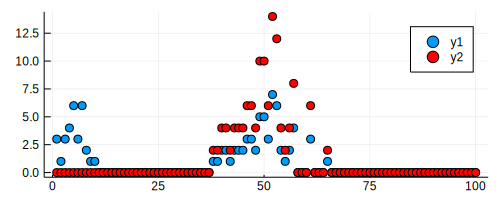

In [93]:
plot(size=(500, 200))
plot!(1:100, x, seriestype=:scatter)
plot!(1:100, y, seriestype=:scatter, color=:red)

In [94]:
# 正規化
x ./= sum(x);
y ./= sum(y);

### 移動コスト

In [66]:
C = zeros(100, 100)
for i in 1:100, j in 1:100
    C[i, j] = abs(i - j)
end

# モデル

In [95]:
m = Model(with_optimizer(Cbc.Optimizer, logLevel=0))

@variable(m, 0.0 <= P[1:100, 1:100] <= 1.0)

# x(row) and y(column) margin
for i in 1:100
    @constraint(m, sum(P[i, j] for j in 1:100) == x[i])
    @constraint(m, sum(P[j, i] for j in 1:100) == y[i])
end


@objective(m, Min, sum(C[i, j] * P[i, j] for i in 1:100, j in 1:100));

In [96]:
optimize!(m)
println(JuMP.objective_value(m))

14.950000000000001


In [98]:
valP = zeros(100, 100)
for i in 1:100, j in 1:100
    valP[i, j] = value(P[i, j])
end

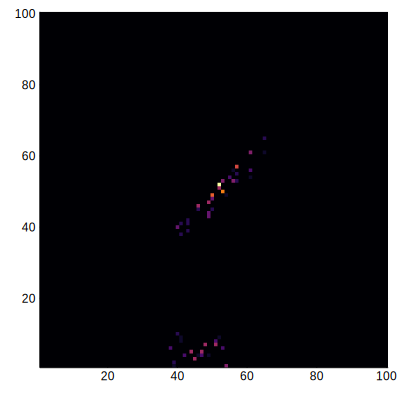

In [111]:
heatmap(1:100, 1:100, valP, colorbar=false, size=(400, 400))

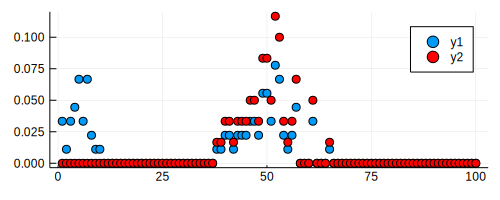

In [112]:
plot(size=(500, 200))
plot!(1:100, x, seriestype=:scatter)
plot!(1:100, y, seriestype=:scatter, color=:red)